In [1]:
# Base libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline


#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# Business Case and Questions

A company wants to expand its market to Brazil. Focus on delivery.

Information I can extract from the datasets:

- Delivery time
- Delivery location


## Hypothesis and questions

**"We want to sell in a marketplace in Brazil. Where should our warehouse be located?"**

#### Null hypothesis

The location of the warehouse has no effect on the success for an ecommerce business expansion into Brazil

#### Questions

- Where are the most of the customers?
- Which delivery times are they used to? Can we offer a better service?
- How does it the delivery time depend on the seller's location


In [2]:
customers= pd.read_csv('olist_customers_dataset.csv')

In [3]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

In [4]:
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [5]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [6]:
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [7]:
states_info = pd.read_csv('states_info.csv')

## 1. Customers

In [8]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
customers.shape

(99441, 5)

In [10]:
customers.isnull().sum().sum()

0

#### Group the customers by customer_state to get a feeling where the most customers are

In [11]:
state_cust = customers.groupby('customer_state').size()
state_cust

customer_state
AC       81
AL      413
AM      148
AP       68
BA     3380
CE     1336
DF     2140
ES     2033
GO     2020
MA      747
MG    11635
MS      715
MT      907
PA      975
PB      536
PE     1652
PI      495
PR     5045
RJ    12852
RN      485
RO      253
RR       46
RS     5466
SC     3637
SE      350
SP    41746
TO      280
dtype: int64

## 2. Sellers

In [12]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
sellers.shape

(3095, 4)

In [14]:
sellers.isnull().sum().sum()

0

#### Group the sellers by seller_state to get a feeling where the most sellers are

In [15]:
state_sellers = sellers.groupby('seller_state').size()
state_sellers

seller_state
AC       1
AM       1
BA      19
CE      13
DF      30
ES      23
GO      40
MA       1
MG     244
MS       5
MT       4
PA       1
PB       6
PE       9
PI       1
PR     349
RJ     171
RN       5
RO       2
RS     129
SC     190
SE       2
SP    1849
dtype: int64

## 3. Geolocation

In [16]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
geolocation.shape

(1000163, 5)

In [18]:
geolocation.isnull().sum().sum()

0

In [19]:
geolocation['geolocation_state'].value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

## 4. States

In [20]:
states_info.head()

,Name,Code,Capital,Largest city,Area,Population,Density,GDP,HDI
0,Acre,AC,Rio Branco,Rio Branco,"164,124","894,470",5.37,"13,751",0.719
1,Alagoas,AL,Maceió,Maceió,"27,843","3,351,543",119.86,"49,456",0.683
2,Amapá,AP,Macapá,Macapá,"142,471","861,773",5.94,"14,339",0.740
3,Amazonas,AM,Manaus,Manaus,"1,559,168","4,207,714",2.66,"89,017",0.733
4,Bahia,BA,Salvador,Salvador,"564,723","14,930,634",26.34,"258,649",0.714


In [21]:
states_info.shape

(27, 9)

In [22]:
states_info.isnull().sum().sum()

0

#### Formatting in lowercase and getting rid off of spaces

In [23]:
states_info.columns= states_info.columns.str.replace(' ', '_').str.lower()

In [24]:
states_info.rename(columns={"name": "state_name"}, inplace=True)

In [25]:
states_info.head()

,state_name,code,capital,largest_city,area,population,density,gdp,hdi
0,Acre,AC,Rio Branco,Rio Branco,"164,124","894,470",5.37,"13,751",0.719
1,Alagoas,AL,Maceió,Maceió,"27,843","3,351,543",119.86,"49,456",0.683
2,Amapá,AP,Macapá,Macapá,"142,471","861,773",5.94,"14,339",0.740
3,Amazonas,AM,Manaus,Manaus,"1,559,168","4,207,714",2.66,"89,017",0.733
4,Bahia,BA,Salvador,Salvador,"564,723","14,930,634",26.34,"258,649",0.714


#### Merging geolocation and states_info dataframes

In [26]:
geo_info = pd.merge(geolocation, states_info, left_on=['geolocation_state'], right_on=['code'], how='left')
geo_info.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,state_name,code,capital,largest_city,area,population,density,gdp,hdi
0,1037,-23.545621,-46.639292,sao paulo,SP,São Paulo,SP,São Paulo,São Paulo,"248,219","46,289,333",184.99,"2,038,005",0.826
1,1046,-23.546081,-46.644820,sao paulo,SP,São Paulo,SP,São Paulo,São Paulo,"248,219","46,289,333",184.99,"2,038,005",0.826
2,1046,-23.546129,-46.642951,sao paulo,SP,São Paulo,SP,São Paulo,São Paulo,"248,219","46,289,333",184.99,"2,038,005",0.826
3,1041,-23.544392,-46.639499,sao paulo,SP,São Paulo,SP,São Paulo,São Paulo,"248,219","46,289,333",184.99,"2,038,005",0.826
4,1035,-23.541578,-46.641607,sao paulo,SP,São Paulo,SP,São Paulo,São Paulo,"248,219","46,289,333",184.99,"2,038,005",0.826


In [27]:
geo_info.shape

(1000163, 14)

In [28]:
geo_info.isnull().sum().sum()

0

#### Simplifying keeping just the states and their information

In [29]:
simple_geo = geo_info.drop(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'code', 'geolocation_city'], axis=1).drop_duplicates().reset_index(drop=True)

In [30]:
simple_geo.head()

,geolocation_state,state_name,capital,largest_city,area,population,density,gdp,hdi
0,SP,São Paulo,São Paulo,São Paulo,"248,219","46,289,333",184.99,"2,038,005",0.826
1,RN,Rio Grande do Norte,Natal,Natal,"52,810","3,534,165",66.41,"59,661",0.731
2,AC,Acre,Rio Branco,Rio Branco,"164,124","894,470",5.37,"13,751",0.719
3,RJ,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,"43,750","17,366,189",394.62,"640,186",0.796
4,ES,Espírito Santo,Vitória,Serra,"46,074","4,064,052",87.22,"109,227",0.772


In [31]:
simple_geo.shape

(27, 9)

In [32]:
simple_geo['state_name'].value_counts()

 Goiás                  1
 Rondônia               1
 Rio Grande do Norte    1
 Minas Gerais           1
 Pernambuco             1
 Paraíba                1
 Mato Grosso do Sul     1
 São Paulo              1
 Santa Catarina         1
 Mato Grosso            1
 Pará                   1
 Espírito Santo         1
 Distrito Federal       1
 Acre                   1
 Amazonas               1
 Maranhão               1
 Alagoas                1
 Rio Grande do Sul      1
 Ceará                  1
 Roraima                1
 Paraná                 1
 Rio de Janeiro         1
 Piauí                  1
 Tocantins              1
 Bahia                  1
 Amapá                  1
 Sergipe                1
Name: state_name, dtype: int64

In [33]:
geo_info_file = simple_geo.to_csv(r'/Users/maria/Final_project/Olist/geo_info_file.csv')

## 4. Orders

In [34]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [35]:
orders.shape

(99441, 8)

In [36]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [37]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [38]:
duplicateRowsorders = orders[orders.duplicated(['order_id'])]

duplicateRowsorders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


As we can see the columns with dates are objects, so I have to convert them into dates.

Since I will concentrate on the days, I will create another dataframe without the time.

### 4.1 Orders - Delivery time

In [39]:
new_purchase = orders['order_purchase_timestamp'].str.split(" ", n=1, expand=True)

orders['order_purchase_date'] = new_purchase[0]

In [40]:
new_delivers = orders['order_delivered_customer_date'].str.split(" ", n=1, expand=True)

orders['delivered_customer_date'] = new_delivers[0]

In [41]:
new_estimated = orders['order_estimated_delivery_date'].str.split(" ", n=1, expand=True)

orders['estimated_delivery_date'] = new_estimated[0]

In [42]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,delivered_customer_date,estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,2018-02-16,2018-02-26


In [43]:
new_orders = orders.drop(['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)

In [44]:
new_orders

,order_id,customer_id,order_status,order_purchase_date,delivered_customer_date,estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-17,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-28,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-09-21,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-25,2018-02-15


In [45]:
new_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 99441 non-null  object
 1   customer_id              99441 non-null  object
 2   order_status             99441 non-null  object
 3   order_purchase_date      99441 non-null  object
 4   delivered_customer_date  96476 non-null  object
 5   estimated_delivery_date  99441 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [46]:
import datetime

new_orders['order_purchase_date'] = pd.to_datetime(new_orders['order_purchase_date'])
new_orders['delivered_customer_date'] = pd.to_datetime(new_orders['delivered_customer_date'])
new_orders['estimated_delivery_date'] = pd.to_datetime(new_orders['estimated_delivery_date'])

In [47]:
new_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 99441 non-null  object        
 1   customer_id              99441 non-null  object        
 2   order_status             99441 non-null  object        
 3   order_purchase_date      99441 non-null  datetime64[ns]
 4   delivered_customer_date  96476 non-null  datetime64[ns]
 5   estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


In [48]:
new_orders.head()

,order_id,customer_id,order_status,order_purchase_date,delivered_customer_date,estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26


**Important here:**

- delivery time = delivered_customer_date - order_purchase_date
- estimated delivery time = estimated_delivery_date - delivered_customer_date
- difference real delivery and estimated delivery times = estimated delivery time - delivery time

In [49]:
from datetime import datetime

# Calculating Real delivery time in days
new_orders['real_delivery_time'] = abs(new_orders['delivered_customer_date'] - new_orders['order_purchase_date'])

# Calculating Estimated delivery time in days
new_orders['estimated_delivery_time'] = abs(new_orders['estimated_delivery_date'] - new_orders['delivered_customer_date'])

# Calculating difference between Estimated and Real delivery time in days
new_orders['difference_delivery_time'] = abs(new_orders['estimated_delivery_time'] - new_orders['real_delivery_time'])


In [50]:
new_orders.head()

,order_id,customer_id,order_status,order_purchase_date,delivered_customer_date,estimated_delivery_date,real_delivery_time,estimated_delivery_time,difference_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,8 days,8 days,0 days
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,14 days,6 days,8 days
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,9 days,18 days,9 days
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,14 days,13 days,1 days
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,3 days,10 days,7 days


In [51]:
order_cust = orders.groupby('customer_id').size()
order_cust

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffecc9f79fd8c764f843e9951b11341    1
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    1
ffffe8b65bbe3087b653a978c870db99    1
Length: 99441, dtype: int64

According to the data every customer just placed one order, so that I cannot group the customers by most active

In [52]:
orders['customer_id'].nunique()

99441

#### Dataframe with just delivered orders, customer city, seller city, difference_delivery_time

Needed in the same table:
- seller_id 
- customer_state
- seller_state

new_orders (customer_id) > customers > customer_state
new_orders (order_id) > order_items (seller_id) > sellers > seller_state

In [53]:
# Dropping all rows with no delivered products

no_delivered = new_orders[ new_orders['order_status'] != 'delivered' ].index
new_orders.drop(no_delivered, inplace = True) 

In [54]:
# First level: customers with new_orders on customer_id.
# There are the same no of customers and orders (99,441)
# Therefore an inner join will do it

firstleveltime = pd.merge(new_orders [['order_id', 'customer_id', 'difference_delivery_time']] , customers [['customer_id','customer_state']], on=['customer_id'], how='inner')
firstleveltime.head()

,order_id,customer_id,difference_delivery_time,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0 days,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,8 days,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9 days,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,1 days,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,7 days,SP


In [55]:
#Dropping customer_id from firstleveltime

firstleveltimeclean = firstleveltime.drop(['customer_id'], axis=1)

In [56]:
firstleveltimeclean.head()

,order_id,difference_delivery_time,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,0 days,SP
1,53cdb2fc8bc7dce0b6741e2150273451,8 days,BA
2,47770eb9100c2d0c44946d9cf07ec65d,9 days,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,1 days,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,7 days,SP


In [57]:
firstleveltimeclean.shape

(96478, 3)

In [58]:
# Second level: firstleveltimeclean with order_items on order_id.
# Different number of observations: firstlevelclean has 96,478 and order_items has 112,650
# Reason: There are duplicates for the order_id


secondleveltime = pd.merge(firstleveltimeclean, order_items[['order_id', 'seller_id']], on=['order_id'], how='inner')
secondleveltime.head()

,order_id,difference_delivery_time,customer_state,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,0 days,SP,3504c0cb71d7fa48d967e0e4c94d59d9
1,53cdb2fc8bc7dce0b6741e2150273451,8 days,BA,289cdb325fb7e7f891c38608bf9e0962
2,47770eb9100c2d0c44946d9cf07ec65d,9 days,GO,4869f7a5dfa277a7dca6462dcf3b52b2
3,949d5b44dbf5de918fe9c16f97b45f8a,1 days,RN,66922902710d126a0e7d26b0e3805106
4,ad21c59c0840e6cb83a9ceb5573f8159,7 days,SP,2c9e548be18521d1c43cde1c582c6de8


In [59]:
secondleveltime.shape

(110197, 4)

In [60]:
null_columns = secondleveltime.columns[secondleveltime.isnull().any()]
secondleveltime[null_columns].isnull().sum()

difference_delivery_time    8
dtype: int64

In [61]:
# Third level: secondleveltime with sellers on seller_id.
# Different number of observations: secondlevelclean has 110,197 and sellers 3095
# Therefore I need a left join

thirdleveltime = pd.merge(secondleveltime, sellers[['seller_id', 'seller_state']], on=['seller_id'], how='left')
thirdleveltime.head()

,order_id,difference_delivery_time,customer_state,seller_id,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,0 days,SP,3504c0cb71d7fa48d967e0e4c94d59d9,SP
1,53cdb2fc8bc7dce0b6741e2150273451,8 days,BA,289cdb325fb7e7f891c38608bf9e0962,SP
2,47770eb9100c2d0c44946d9cf07ec65d,9 days,GO,4869f7a5dfa277a7dca6462dcf3b52b2,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,1 days,RN,66922902710d126a0e7d26b0e3805106,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,7 days,SP,2c9e548be18521d1c43cde1c582c6de8,SP


In [62]:
thirdleveltime.shape

(110197, 5)

In [63]:
thirdleveltime = thirdleveltime.drop(['seller_id', 'order_id'], axis=1)

In [64]:
thirdleveltime.head()

,difference_delivery_time,customer_state,seller_state
0,0 days,SP,SP
1,8 days,BA,SP
2,9 days,GO,SP
3,1 days,RN,MG
4,7 days,SP,SP


In [65]:
thirdleveltime['difference_delivery_time'].value_counts()

2 days      7725
4 days      7590
3 days      7381
1 days      7354
5 days      6876
            ... 
101 days       1
56 days        1
72 days        1
64 days        1
71 days        1
Name: difference_delivery_time, Length: 74, dtype: int64

In [66]:
thirdleveltime.shape

(110197, 3)

In [67]:
thirdleveltime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   difference_delivery_time  110189 non-null  timedelta64[ns]
 1   customer_state            110197 non-null  object         
 2   seller_state              110197 non-null  object         
dtypes: object(2), timedelta64[ns](1)
memory usage: 3.4+ MB


In [68]:
# The type for difference_delivery_time has to be changed in order to calculate the average

thirdleveltime["difference_delivery_time"] = thirdleveltime["difference_delivery_time"].dt.days

thirdleveltime.head()

,difference_delivery_time,customer_state,seller_state
0,0.0,SP,SP
1,8.0,BA,SP
2,9.0,GO,SP
3,1.0,RN,MG
4,7.0,SP,SP


#### Checking the distributions with plots

<AxesSubplot:xlabel='difference_delivery_time', ylabel='Density'>

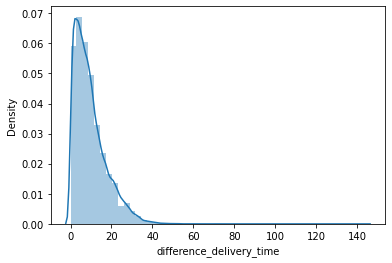

In [69]:
sns.distplot(thirdleveltime['difference_delivery_time'])

<AxesSubplot:xlabel='difference_delivery_time'>

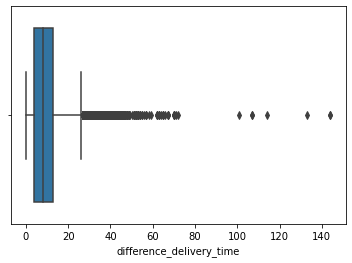

In [70]:
sns.boxplot(x=thirdleveltime['difference_delivery_time'])

In [71]:
# Creating a new dataframe with the combination of routes between states and the average delivery time

final_time = thirdleveltime.groupby(['customer_state', 'seller_state'])['difference_delivery_time'].mean().reset_index()

final_time.rename(columns={"difference_delivery_time": "avg_delivery_time"}, inplace=True)

final_time.head()

,customer_state,seller_state,avg_delivery_time
0,AC,BA,43.0
1,AC,DF,12.0
2,AC,GO,12.0
3,AC,MA,18.0
4,AC,MG,14.2


In [72]:
final_time.shape

(412, 3)

In [73]:
final_time_filev2 = final_time.to_csv(r'/Users/maria/Final_project/Olist/final_timev2.csv')

## 5. Ordered items

In [74]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [75]:
order_items.shape

(112650, 7)

In [76]:
order_items.isnull().sum().sum()

0

**Important here:**

- Order_item_id: sequential number identifying number of items included in the same order


In [77]:
order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

In [78]:
order_items['order_id'].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
4123f9252f0d0572f075dbb5a95d9cc6     1
bae57c09bbe07561fcbfefd604dafba8     1
bc24d527d42f42c735765229820d488c     1
63067dbad99fa8dd94df9e6983bff614     1
891a2a73007fba5bc9bfb7ea1f486171     1
Name: order_id, Length: 98666, dtype: int64

In [79]:
multiple_orders = order_items['order_item_id'] > 1

order_items[multiple_orders]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [80]:
duplicateRowsDF = order_items[order_items.duplicated(['order_id'])]

duplicateRowsDF

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


### 5.1 Ordered items - Delivery location

#### Checking combinations between customers and sellers

Needed in the same table:
- customer_state
- seller_state

customers (customer_id) > orders (order_id) > order_items (seller_id) > sellers

In [81]:
# First level: customers with orders on customer_id.
# There are the same no of customers and orders (99,441)
# Therefore an inner join will do it

firstlevel = pd.merge(customers, orders, on=['customer_id'], how='inner')
firstlevel.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,delivered_customer_date,estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16,2017-05-25,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-12,2018-01-29,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-19,2018-06-14,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-13,2018-03-28,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-29,2018-08-09,2018-08-15


In [82]:
#Dropping unnecessary features from firstlevel

firstlevelclean = firstlevel.drop(['customer_unique_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_purchase_date', 'delivered_customer_date', 'estimated_delivery_date'], axis=1)

In [83]:
firstlevelclean.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f


In [84]:
firstlevelclean.shape

(99441, 5)

In [85]:
# Second level: firstlevelclean with order_items on order_id.
# Different number of observations: firstlevelclean has 99,441 and order_items has 112,650
# Reason: There are duplicates for the order_id
# Therefore I need a right join

secondlevel = pd.merge(firstlevelclean, order_items, on=['order_id'], how='right')
secondlevel.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,3ce436f183e68e07877b285a838db11a,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,f6dd3ec061db4e3987629fe6b26e5cce,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,6489ae5e4333f3693df5ad4372dab6d3,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,d4eb9395c8c0431ee92fce09860c5a06,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,58dbd0b2d70206bf40e62cd34e84d795,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [86]:
secondlevel.shape

(112650, 11)

In [87]:
null_columns = secondlevel.columns[secondlevel.isnull().any()]
secondlevel[null_columns].isnull().sum()

Series([], dtype: float64)

In [88]:
secondlevel['customer_id'].isnull()[null_columns]

Series([], Name: customer_id, dtype: bool)

In [89]:
#Dropping unnecessary features from secondlevel

secondlevelclean = secondlevel.drop(['order_item_id', 'product_id', 'shipping_limit_date', 'price', 'freight_value'], axis=1)

In [90]:
secondlevelclean.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,seller_id
0,3ce436f183e68e07877b285a838db11a,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202
1,f6dd3ec061db4e3987629fe6b26e5cce,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36
2,6489ae5e4333f3693df5ad4372dab6d3,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d
3,d4eb9395c8c0431ee92fce09860c5a06,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4
4,58dbd0b2d70206bf40e62cd34e84d795,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87


In [91]:
secondlevelclean.shape

(112650, 6)

In [92]:
# Third level: secondlevelclean with sellers on seller_id.
# Different number of observations: secondlevelclean has 112,650 and sellers 3095
# Therefore I need a left join

thirdlevel = pd.merge(secondlevelclean, sellers, on=['seller_id'], how='left')
thirdlevel.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3ce436f183e68e07877b285a838db11a,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP
1,f6dd3ec061db4e3987629fe6b26e5cce,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP
2,6489ae5e4333f3693df5ad4372dab6d3,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG
3,d4eb9395c8c0431ee92fce09860c5a06,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP
4,58dbd0b2d70206bf40e62cd34e84d795,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR


In [93]:
# Dropping rows where there are NaN

thirdlevel.dropna(inplace = True)
thirdlevel.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3ce436f183e68e07877b285a838db11a,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP
1,f6dd3ec061db4e3987629fe6b26e5cce,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP
2,6489ae5e4333f3693df5ad4372dab6d3,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG
3,d4eb9395c8c0431ee92fce09860c5a06,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP
4,58dbd0b2d70206bf40e62cd34e84d795,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR


In [94]:
thirdlevelclean = thirdlevel.drop(['customer_zip_code_prefix', 'customer_city', 'seller_zip_code_prefix', 'seller_city'], axis=1)

In [95]:
thirdlevelclean.head()

,customer_id,customer_state,order_id,seller_id,seller_state
0,3ce436f183e68e07877b285a838db11a,RJ,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,SP
1,f6dd3ec061db4e3987629fe6b26e5cce,SP,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,SP
2,6489ae5e4333f3693df5ad4372dab6d3,MG,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,MG
3,d4eb9395c8c0431ee92fce09860c5a06,SP,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,SP
4,58dbd0b2d70206bf40e62cd34e84d795,SP,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,PR


In [96]:
thirdlevelclean.shape

(112650, 5)

In [97]:
thirdlevelclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   customer_id     112650 non-null  object
 1   customer_state  112650 non-null  object
 2   order_id        112650 non-null  object
 3   seller_id       112650 non-null  object
 4   seller_state    112650 non-null  object
dtypes: object(5)
memory usage: 5.2+ MB


In [98]:
thirdlevelclean.isnull().sum().sum()

0

In [99]:
customers_sellers_states = thirdlevelclean.to_csv(r'/Users/maria/Final_project/Olist/customers_sellers_states.csv')